In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def update_temp(T0, k, type='exp'):
    if type is 'exp':
        return T0*np.power(0.97,k)
    elif type is 'fast':
        return T0/k
    elif type is 'log':
        return T0/np.log(k)

In [3]:
def update_guess(x, T):
    return (x-T) + 2*T*np.random.rand(x.size)

In [4]:
#Rastrigin function has 
def f(x):
    x = np.array(x)
    n = x.size
    sum = 0
    for i in x:
        sum += i**2 - 10*np.cos(2*np.pi*i)
    return 10*n + sum


def anneal(x0, T0, type='exp', tol=1e-3):
    k = 1 #current iterate
    x = np.array(x0)
    x_min = x
    T = T0
    
    f_old = np.inf
    f_curr = f(x0)
    f_min = f_curr
        
    while np.absolute(f_old-f_curr) > tol:
        
        T = update_temp(T0, k, type)
        x_candidate = update_guess(x, T)
        f_candidate = f(x_candidate)
        
        if f_candidate < f_curr:
            #keep track of minimum function value
            if f_candidate < f_min:
                f_min = f_candidate
                x_min = x_candidate
            
            x = x_candidate
            f_old = f_curr
            f_curr = f_candidate
        else:
            delta = f_candidate - f_curr #Always pos since previous if-statement rules out neg vals
            acceptance_prob = 1/(1+np.exp(delta/T))
            random_num = np.random.rand()
            if random_num < acceptance_prob:
                x = x_candidate
                f_old = f_curr
                f_curr = f_candidate
            #else x stays the same, and we don't update
        
        k += 1
            
    return x_min, k

In [9]:
import time

f_mins=[] #keep track of minima after each call to anneal
iterations=[] #keep track of interations taken to reach minima for each call to anneal

x = 100*np.random.rand(25)
T0 = 10
print("x:",x)
f_old = f(x)
f_new = f_old
print("f(x):",f_old)
f_mins.append(f_old)

#In this loop, the anneal algo is seeded with the current best solution.
#The initial temperature is also decreased each run according to the 'exp' option
start_time = time.time()
for j in range(1,50):
    x, k = anneal(x, update_temp(T0,j), type='exp', tol=1e-2)
    f_old = f_new
    f_new = f(x)
    f_mins.append(f_new)
    iterations.append(k)
    print("x:",x)
    print("f(x):",f_new)
    print("--- %s seconds ---" % (time.time() - start_time))

x: [ 1.78613854 67.31683687 67.26614688 50.06477994 24.06846398 55.26174353
 99.53310978 24.06127572 85.52202474 80.80395011 94.65550127 28.26821788
 32.01037691 93.2058577  25.08538355  9.93560977 29.16418497 43.31734718
  0.21814201 71.62627559 37.63106684 51.39386364 79.77759191 14.94753427
 46.03498177]
f(x): 80565.12955047736
x: [ 1.1158067  54.8081473  64.94170395 22.97110285  8.96010613 53.71032623
 59.85528998  8.13951123 38.82476322 45.70149017 63.90249999 39.65243023
 27.74471091 63.53357309 21.06571887 12.56518903 17.48539134 17.2467602
 12.05161691 55.58685843 36.3068243  41.90725683 68.83618579 32.31595636
 37.92576731]
f(x): 43357.97382856197
--- 0.06353235244750977 seconds ---
x: [20.92614444 25.7820812  47.41306109 22.87692715 10.39504044 42.81133372
 46.41654768 -5.31775667 -0.8618034  41.93070293 60.8703975  31.80498594
 20.70522846 38.87937821 27.80931037  0.12832393 24.86339115 17.96553917
  3.93838377 34.68217239 20.61010664 18.5125466  55.71458657 42.73385186
 26.

x: [ 3.98878830e+00  9.84804496e-01  5.97610567e+00 -6.96260783e+00
 -6.95167420e+00  7.97061298e+00  1.98979385e+00 -3.96414700e+00
 -5.96702323e+00  3.97776816e+00  1.98051575e+00  6.96702450e+00
  5.96914543e+00  3.97447033e+00  4.97761873e+00  2.75436459e-03
  4.97849877e+00  5.96441968e+00 -1.98877650e+00  1.98140396e+00
  6.96375787e+00 -1.99020546e+00  2.98833187e+00  7.96049852e+00
  1.52304028e-03]
f(x): 609.1093252088156
--- 1.0972392559051514 seconds ---
x: [ 3.98330697e+00  9.88430943e-01  5.97666648e+00 -6.96950726e+00
 -6.96202163e+00  7.96881426e+00  1.98848039e+00 -3.97012967e+00
 -5.96212642e+00  3.97853922e+00  1.97853068e+00  6.97016969e+00
  5.96810019e+00  3.97433743e+00  4.97713852e+00 -8.51956226e-03
  4.97863008e+00  5.96947768e+00 -1.98425367e+00  1.98451452e+00
  6.96937345e+00 -1.99205332e+00  2.99142275e+00  7.96102209e+00
  4.81735263e-03]
f(x): 609.067084970221
--- 1.1447572708129883 seconds ---
x: [ 3.98330697e+00  9.88430943e-01  5.97666648e+00 -6.969507

x: [ 3.98010464e+00  9.93118413e-01  5.97083905e+00 -6.96203872e+00
 -6.96320485e+00  7.95597196e+00  1.98922151e+00 -3.97979960e+00
 -5.96324538e+00  3.97855924e+00  1.99039912e+00  6.96958694e+00
  5.96302837e+00  3.97466571e+00  4.97691327e+00 -4.29509699e-05
  4.97178404e+00  5.96959551e+00 -1.98668076e+00  1.99166487e+00
  6.96217412e+00 -1.98756551e+00  2.98647277e+00  7.96174212e+00
 -2.14554836e-03]
f(x): 608.9456732610778
--- 2.0205776691436768 seconds ---
x: [ 3.98010464e+00  9.93118413e-01  5.97083905e+00 -6.96203872e+00
 -6.96320485e+00  7.95597196e+00  1.98922151e+00 -3.97979960e+00
 -5.96324538e+00  3.97855924e+00  1.99039912e+00  6.96958694e+00
  5.96302837e+00  3.97466571e+00  4.97691327e+00 -4.29509699e-05
  4.97178404e+00  5.96959551e+00 -1.98668076e+00  1.99166487e+00
  6.96217412e+00 -1.98756551e+00  2.98647277e+00  7.96174212e+00
 -2.14554836e-03]
f(x): 608.9456732610778
--- 2.0652999877929688 seconds ---
x: [ 3.98010464e+00  9.93118413e-01  5.97083905e+00 -6.96203

In [10]:
f([0,0,0,0,0,0]) #minimum of Rastragin function

0.0

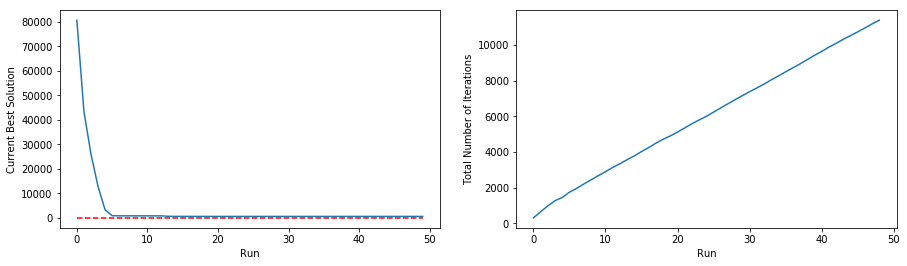

In [21]:
fig, axes = plt.subplots(ncols=2, figsize=(15,4))
axes[0].clear()
axes[1].clear()

axes[0].plot(f_mins)
axes[0].plot(np.full(len(f_mins),0),'r--')
axes[0].set(xlabel='Run',ylabel='Current Best Solution')

arr = np.zeros(len(iterations))
arr[0] = iterations[0]
for it in range(1, len(iterations)):
    arr[it] = iterations[it] + arr[it-1] 
axes[1].plot(arr)
axes[1].set(xlabel='Run',ylabel='Total Number of Iterations')

fig.savefig('Convergence.png', dpi=100, bbox_inches='tight')

Text(0, 0.5, 'Total Number of Iterations')

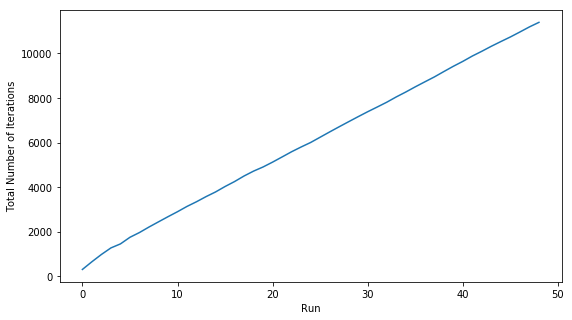

In [12]:
arr = np.zeros(len(iterations))
arr[0] = iterations[0]

for it in range(1, len(iterations)):
    arr[it] = iterations[it] + arr[it-1]

plt.figure(figsize=(9,5))
plt.plot(arr)
plt.xlabel("Run")
plt.ylabel("Total Number of Iterations")